In [1]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import cv2
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt

# Root directory of the project
ROOT_DIR = os.path.abspath("../../../..")
tf.compat.v1.enable_eager_execution()
# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn.config import Config
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log
from ycbv_loader import YCBVDataset

In [2]:
class YCBVConfig(Config):
    """Configuration for training on the toy shapes dataset.
    Derives from the base Config class and overrides values specific
    to the toy shapes dataset.
    """
    # Give the configuration a recognizable name
    NAME = 'ycb'
    GPU_COUNT = 1
    IMAGES_PER_GPU = 2
    NUM_CLASSES = 1 + 21
    IMAGE_MIN_DIM = 320
    IMAGE_MAX_DIM = 320
    TRAIN_ROIS_PER_IMAGE = 100
    STEPS_PER_EPOCH = 100
    VALIDATION_STEPS = 5
    
config = YCBVConfig()
# config.display()

In [3]:
data_dir = os.path.join(ROOT_DIR, '50_images')
dataset_train = YCBVDataset(data_dir, split='train')
dataset_train.load_ycbv()
dataset_train.prepare()

(320, 320, 7)


TypeError: Invalid shape (320, 320, 0) for image data

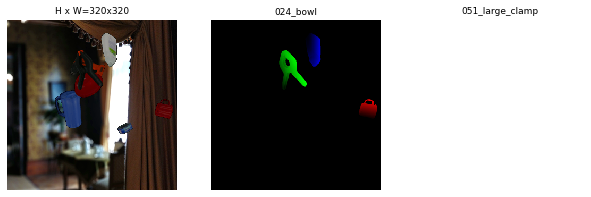

In [5]:
# Load and display random samples
image_ids = np.random.choice(dataset_train.image_ids, 4)
for image_id in image_ids[:1]:
    image = dataset_train.load_image(image_id)
    rgb_masks, class_ids = dataset_train.load_rgb_mask(image_id)
    print(rgb_masks.shape)
    visualize.display_rgb_top_masks(image, rgb_masks, class_ids, dataset_train.class_names, limit=3)
# for image_id in image_ids[:1]:
#     image = dataset_train.load_image(image_id)
#     binary_masks, class_ids = dataset_train.load_mask(image_id)
#     visualize.display_top_masks(image, binary_masks, class_ids, dataset_train.class_names, limit=3)

In [4]:
from matplotlib import patches,  lines
from matplotlib.patches import Polygon
from skimage.measure import find_contours

061_foam_brick
036_wood_block
040_large_marker
025_mug
011_banana
021_bleach_cleanser
006_mustard_bottle


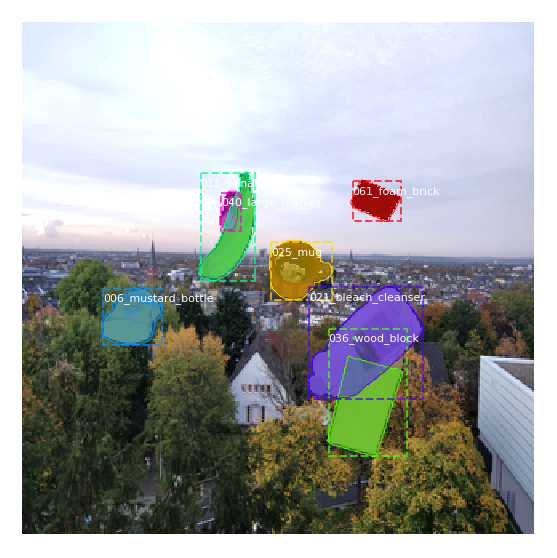

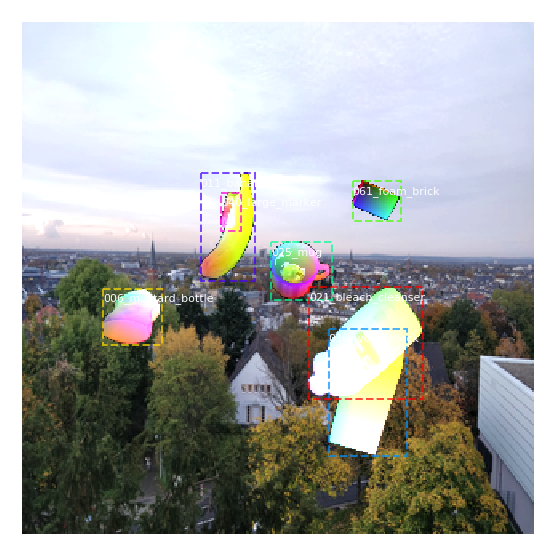

In [16]:
# Load random image and mask.
image_id = random.choice(dataset_train.image_ids)
image, _, class_id, bbox, binary_mask, rgb_mask = modellib.load_image_gt(dataset_train, config, image_id, use_mini_mask=False)
binary_mask = (binary_mask * 255).astype(np.uint8)
rgb_mask = (rgb_mask * 255).astype(np.uint8)
visualize.display_instances(image, bbox, binary_mask, class_id, dataset_train.class_names, figsize=(10, 10), show_mask=True)
visualize.display_rgb_instances(image, bbox, rgb_mask, class_id, dataset_train.class_names, figsize=(10, 10), show_mask=True)

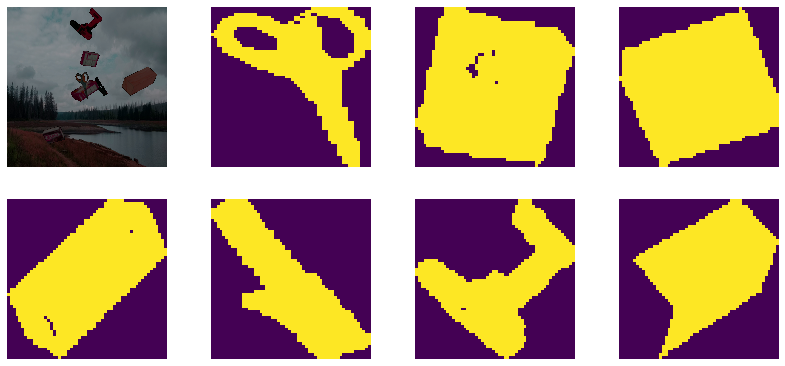

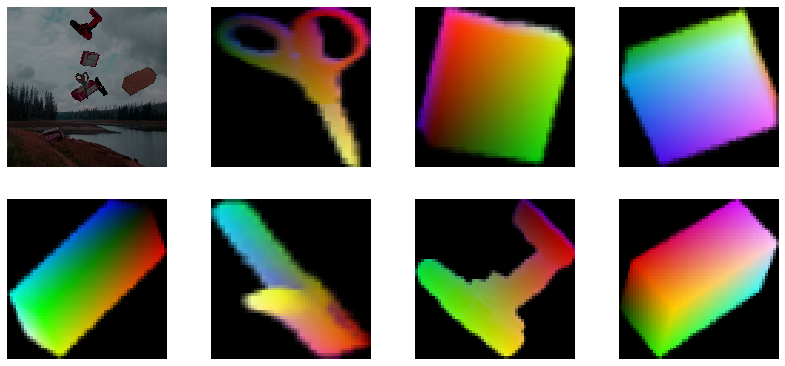

In [14]:
# Load random image and mask.
image_id = random.choice(dataset_train.image_ids)
image, _, class_id, bbox, binary_mask, rgb_mask = modellib.load_image_gt(dataset_train, config, image_id, use_mini_mask=True)
binary_mask = (binary_mask * 255).astype(np.uint8)
rgb_mask = (rgb_mask * 255).astype(np.uint8)
# print('image id...', image_id)
# Display image and additional stats
# log("image", image)
# log("mask", mask)
# log("class_ids", class_id)
# log("bbox", bbox)
# mini_mask = utils.minimize_rgb_mask(bbox, mask, config.MINI_MASK_SHAPE)
# plt.imshow(mini_mask[:, :, 0:3])
# plt.show()
visualize.display_images([image]+[binary_mask[:, :, i] for i in range(0, binary_mask.shape[-1])])
visualize.display_images([image]+[rgb_mask[:, :, i:i+3] for i in range(0, rgb_mask.shape[-1], 3)])

In [7]:
gt_masks = tf.constant(mask.T[:, :, 0:3], dtype=tf.float32)
binary_masks, _ = dataset_train.load_mask(image_id)
pred_mask = binary_masks[:, :, 0]
print(np.unique(pred_mask))
# pred_masks = tf.constant(np.stack([pred_mask, pred_mask, pred_mask], axis=2), dtype=tf.float32)
# loss = K.binary_crossentropy(gt_masks, pred_masks, from_logits=True)
# print(K.mean(loss).numpy())

NameError: name 'mask' is not defined